키워드 & 주제 테그 살펴보기   
==

### 0. 컬럼 설명
    (1) keyword : 추천을 위해 교보문고에서 각 책에 단 테그
    (2) subject : 책의 주제와 관련된 테그
    
### 1. keyword 컬럼 정리   
    (1) str -> list 로 변환 
    (2) 하나의 테그인데 띄어쓰기 되어 있는 것들 공백 제거 ('현대인'을 '현대', '인'으로 분석하는 걸 방지하기 위해 )  
    (3) 다시 str -> list
    (4) new_keyword 컬럼에 띄어쓰기로 구분된 문장 추가

### 2. subject 컬럼 정리    
    (1) str -> list로 변환
    (2) # 제거
    (3) 다시 str -> list 변환
    (4) new_subject 컬럼에 띄어쓰기로 구분된 문장 추가
    
### 3. keyword 값 살펴보기
    (1) 전체 개수 7663
    (2) 중복 제거 개수 4221
    (3) 빈도수 내림차순으로 그래프 그리기
    
### 4. subject 값 살펴보기
    (1) 전체 개수 2137
    (2) 중복 제거 개수 1351
    (3) 빈도수 내림차순으로 그래프 그리기
    

In [13]:
book_df = pd.read_csv('../data/keyword.csv')
book_df.tail()

,ISBN,keyword,subject
1502,9788931579833,"['물리학', '골반', '한국인', '카툰', '근육', '어깨']",[]
1503,9791157684137,"['부산', '대한민국', '단어장', '공부', '자음', '성조']",[]
1504,9791125460220,"['영어회화', '직장 생활', '연애', '유튜브 채널', '에티켓', '생활영어']","['#영어회화', '#현지영어', '#생활영어']"
1505,9791156175940,"['언어 지식', '유형 공략', '실전 완벽 대비', '일본어 능력 시험', '청...",[]
1506,9788973646814,"['전치사', '조동사', '스펙', '동태', '구문', '의문문']",[]


In [14]:
len(book_df)

1507

### 1. keyword 컬럼 정리

In [15]:
book_df['keyword'][:1].values

array(["['시인', '수필', '오월', '박준', '박완서', '수필집']"], dtype=object)

In [16]:
# 문자열 데이터를 변환
from ast import literal_eval

In [17]:
book_df['keyword']= book_df['keyword'].apply(literal_eval)

In [18]:
book_df['keyword'][:1].values

array([list(['시인', '수필', '오월', '박준', '박완서', '수필집'])], dtype=object)

In [7]:
# 띄어 쓴 단어 붙이기 - 테스트
#book_df.loc[1, 'keyword'] = "['스토리텔링', '광개토대왕', '기출문제', '파이널', '압축', '막판']"

In [8]:
#book_df['keyword'][1:2]

1    ['스토리텔링', '광개토대왕', '기출문제', '파이널', '압축', '막판']
Name: keyword, dtype: object

In [19]:
# 띄어 쓴 단어 붙이기 - 적용
for idx, x in enumerate(book_df['keyword']):
    print(idx)
    print(x)
    temp = []
    for y in x:
        print(y, type(y))
        y = y.replace(' ', '')
        temp.append(y)
    print(temp)        
    book_df.loc[idx, 'keyword'] = str(temp)
    temp.clear()

0
['시인', '수필', '오월', '박준', '박완서', '수필집']
시인 <class 'str'>
수필 <class 'str'>
오월 <class 'str'>
박준 <class 'str'>
박완서 <class 'str'>
수필집 <class 'str'>
['시인', '수필', '오월', '박준', '박완서', '수필집']
1
['스토리텔링', '광개토 대왕', '기출 문제', '파이널', '압축', '막판']
스토리텔링 <class 'str'>
광개토 대왕 <class 'str'>
기출 문제 <class 'str'>
파이널 <class 'str'>
압축 <class 'str'>
막판 <class 'str'>
['스토리텔링', '광개토대왕', '기출문제', '파이널', '압축', '막판']
2
['페미니즘', '여성학', '시선', '페미니스트', '문화 정치', '역사학자']
페미니즘 <class 'str'>
여성학 <class 'str'>
시선 <class 'str'>
페미니스트 <class 'str'>
문화 정치 <class 'str'>
역사학자 <class 'str'>
['페미니즘', '여성학', '시선', '페미니스트', '문화정치', '역사학자']
3
['인간본성', '어머니', '작가', '한국 소설', '본성', '유진']
인간본성 <class 'str'>
어머니 <class 'str'>
작가 <class 'str'>
한국 소설 <class 'str'>
본성 <class 'str'>
유진 <class 'str'>
['인간본성', '어머니', '작가', '한국소설', '본성', '유진']
4
['가족', '여성', '청소년소설', '한국소설', '장편소설', '여성서사']
가족 <class 'str'>
여성 <class 'str'>
청소년소설 <class 'str'>
한국소설 <class 'str'>
장편소설 <class 'str'>
여성서사 <class 'str'>
['가족', '여성', '청소년소설', '한국소설', '장편소설', '여성서사

정부 실패 <class 'str'>
['거시경제', '통화정책', '매경', '시사상식', '미시경제', '정부실패']
71
['재무 행정', '인사 행정', '총론', '정책', '자치', '조직']
재무 행정 <class 'str'>
인사 행정 <class 'str'>
총론 <class 'str'>
정책 <class 'str'>
자치 <class 'str'>
조직 <class 'str'>
['재무행정', '인사행정', '총론', '정책', '자치', '조직']
72
['출제 예상 문제', '정리', '개념', '채용', '직업윤리', '할인 쿠폰 수록']
출제 예상 문제 <class 'str'>
정리 <class 'str'>
개념 <class 'str'>
채용 <class 'str'>
직업윤리 <class 'str'>
할인 쿠폰 수록 <class 'str'>
['출제예상문제', '정리', '개념', '채용', '직업윤리', '할인쿠폰수록']
73
['독해', '문학', '답안지', '실제 시험지', '온라인', '강화']
독해 <class 'str'>
문학 <class 'str'>
답안지 <class 'str'>
실제 시험지 <class 'str'>
온라인 <class 'str'>
강화 <class 'str'>
['독해', '문학', '답안지', '실제시험지', '온라인', '강화']
74
['동형 모의고사', '핸드북', '오답 분석', '약점 보완', '개정판', '막판']
동형 모의고사 <class 'str'>
핸드북 <class 'str'>
오답 분석 <class 'str'>
약점 보완 <class 'str'>
개정판 <class 'str'>
막판 <class 'str'>
['동형모의고사', '핸드북', '오답분석', '약점보완', '개정판', '막판']
75
['모바일', '공무원 시험', '행정학', '채용', '취약점', '성적']
모바일 <class 'str'>
공무원 시험 <class 'str'>
행정학 <class 'str'>
채용 <cl

162
['인공 지능', '인류세', '과학기술', '비트코인', '지영', '미세 먼지']
인공 지능 <class 'str'>
인류세 <class 'str'>
과학기술 <class 'str'>
비트코인 <class 'str'>
지영 <class 'str'>
미세 먼지 <class 'str'>
['인공지능', '인류세', '과학기술', '비트코인', '지영', '미세먼지']
163
[]
[]
164
['수학자', '수학 퍼즐', '수학 공식', '수학 교재', '미적분학', '웜홀']
수학자 <class 'str'>
수학 퍼즐 <class 'str'>
수학 공식 <class 'str'>
수학 교재 <class 'str'>
미적분학 <class 'str'>
웜홀 <class 'str'>
['수학자', '수학퍼즐', '수학공식', '수학교재', '미적분학', '웜홀']
165
['식물', '커리어', '알파걸', '자연과학', '알마', '네이처']
식물 <class 'str'>
커리어 <class 'str'>
알파걸 <class 'str'>
자연과학 <class 'str'>
알마 <class 'str'>
네이처 <class 'str'>
['식물', '커리어', '알파걸', '자연과학', '알마', '네이처']
166
['상미분 방정식', '선형 대수', '벡터', '수치 해석', '급수', '미적분']
상미분 방정식 <class 'str'>
선형 대수 <class 'str'>
벡터 <class 'str'>
수치 해석 <class 'str'>
급수 <class 'str'>
미적분 <class 'str'>
['상미분방정식', '선형대수', '벡터', '수치해석', '급수', '미적분']
167
['문제', '답안 작성', '기 출제', '관계 법규', '연도', '배점']
문제 <class 'str'>
답안 작성 <class 'str'>
기 출제 <class 'str'>
관계 법규 <class 'str'>
연도 <class 'str'>
배점 <class 'str'>

성 평등 <class 'str'>
성 차별 <class 'str'>
시대 여성 <class 'str'>
['한국여성', '페미니즘', '고백', '성평등', '성차별', '시대여성']
277
['미스터리', '마녀', '탐정', '마법', '교실', '편견']
미스터리 <class 'str'>
마녀 <class 'str'>
탐정 <class 'str'>
마법 <class 'str'>
교실 <class 'str'>
편견 <class 'str'>
['미스터리', '마녀', '탐정', '마법', '교실', '편견']
278
['한국소설', '이별', '간병', '정아', '언니', '딸']
한국소설 <class 'str'>
이별 <class 'str'>
간병 <class 'str'>
정아 <class 'str'>
언니 <class 'str'>
딸 <class 'str'>
['한국소설', '이별', '간병', '정아', '언니', '딸']
279
['성장', '장편소설', '한국소설', '소녀', '작가', '사서함']
성장 <class 'str'>
장편소설 <class 'str'>
한국소설 <class 'str'>
소녀 <class 'str'>
작가 <class 'str'>
사서함 <class 'str'>
['성장', '장편소설', '한국소설', '소녀', '작가', '사서함']
280
['이방인', '세계고전문학', '부조리', '프랑스소설', '영웅', '노벨문학상']
이방인 <class 'str'>
세계고전문학 <class 'str'>
부조리 <class 'str'>
프랑스소설 <class 'str'>
영웅 <class 'str'>
노벨문학상 <class 'str'>
['이방인', '세계고전문학', '부조리', '프랑스소설', '영웅', '노벨문학상']
281
['한국소설', '치유', '소설집', '유머', '레즈비언', '소희']
한국소설 <class 'str'>
치유 <class 'str'>
소설집 <class 'str'>
유머 <class 'str'>


351
['한국로맨스소설', '사랑', '사랑 이야기', '소설', '장편소설', '외계인']
한국로맨스소설 <class 'str'>
사랑 <class 'str'>
사랑 이야기 <class 'str'>
소설 <class 'str'>
장편소설 <class 'str'>
외계인 <class 'str'>
['한국로맨스소설', '사랑', '사랑이야기', '소설', '장편소설', '외계인']
352
['소설', 'SF소설', '소설가', '소설집', '질문', '초엽']
소설 <class 'str'>
SF소설 <class 'str'>
소설가 <class 'str'>
소설집 <class 'str'>
질문 <class 'str'>
초엽 <class 'str'>
['소설', 'SF소설', '소설가', '소설집', '질문', '초엽']
353
['엄마', '아기', '다이어리', '일기장', '이유식', '기록']
엄마 <class 'str'>
아기 <class 'str'>
다이어리 <class 'str'>
일기장 <class 'str'>
이유식 <class 'str'>
기록 <class 'str'>
['엄마', '아기', '다이어리', '일기장', '이유식', '기록']
354
['육아법', '아이', '영국', '육아', '맨체스터', '위드']
육아법 <class 'str'>
아이 <class 'str'>
영국 <class 'str'>
육아 <class 'str'>
맨체스터 <class 'str'>
위드 <class 'str'>
['육아법', '아이', '영국', '육아', '맨체스터', '위드']
355
['자녀양육', '아이 마음', '인성', '아들러', '훈육법', '한국교육개발원']
자녀양육 <class 'str'>
아이 마음 <class 'str'>
인성 <class 'str'>
아들러 <class 'str'>
훈육법 <class 'str'>
한국교육개발원 <class 'str'>
['자녀양육', '아이마음', '인성', '아들러', '훈육법', '한국교육개발원

플라워 <class 'str'>
경주 <class 'str'>
와이파이 <class 'str'>
아이폰 <class 'str'>
왕초보영어 <class 'str'>
['영어회화', '플라워', '경주', '와이파이', '아이폰', '왕초보영어']
402
['전치사', '과거 분사', '현재 분사', '수여 동사', '규칙 동사', '빈도 부사']
전치사 <class 'str'>
과거 분사 <class 'str'>
현재 분사 <class 'str'>
수여 동사 <class 'str'>
규칙 동사 <class 'str'>
빈도 부사 <class 'str'>
['전치사', '과거분사', '현재분사', '수여동사', '규칙동사', '빈도부사']
403
['엄마 아빠', '베이징', '중국어회화', '병음', '회화문', '홀수']
엄마 아빠 <class 'str'>
베이징 <class 'str'>
중국어회화 <class 'str'>
병음 <class 'str'>
회화문 <class 'str'>
홀수 <class 'str'>
['엄마아빠', '베이징', '중국어회화', '병음', '회화문', '홀수']
404
['기초 한자', '어휘', '학습', '한문 교육', '케이스 포함', '정선']
기초 한자 <class 'str'>
어휘 <class 'str'>
학습 <class 'str'>
한문 교육 <class 'str'>
케이스 포함 <class 'str'>
정선 <class 'str'>
['기초한자', '어휘', '학습', '한문교육', '케이스포함', '정선']
405
['시간', '습관', '중급', '동사 원형', '일반 동사', '강 문장']
시간 <class 'str'>
습관 <class 'str'>
중급 <class 'str'>
동사 원형 <class 'str'>
일반 동사 <class 'str'>
강 문장 <class 'str'>
['시간', '습관', '중급', '동사원형', '일반동사', '강문장']
406
['재현', '신비', '사하라 사막', '

472
['현대시', '고전 시가', '내신', '현대 소설', '연계 교재', '문항 유형']
현대시 <class 'str'>
고전 시가 <class 'str'>
내신 <class 'str'>
현대 소설 <class 'str'>
연계 교재 <class 'str'>
문항 유형 <class 'str'>
['현대시', '고전시가', '내신', '현대소설', '연계교재', '문항유형']
473
['순환소수', '유리수', '차 부등식', '차 함수', '다항식', '연립']
순환소수 <class 'str'>
유리수 <class 'str'>
차 부등식 <class 'str'>
차 함수 <class 'str'>
다항식 <class 'str'>
연립 <class 'str'>
['순환소수', '유리수', '차부등식', '차함수', '다항식', '연립']
474
['학년도 수능', '운동', '단어장', '국제 관계', '마스터', '다원화']
학년도 수능 <class 'str'>
운동 <class 'str'>
단어장 <class 'str'>
국제 관계 <class 'str'>
마스터 <class 'str'>
다원화 <class 'str'>
['학년도수능', '운동', '단어장', '국제관계', '마스터', '다원화']
475
['방정식', '인수 분해', '유형서', '모평', '학평', '다항식']
방정식 <class 'str'>
인수 분해 <class 'str'>
유형서 <class 'str'>
모평 <class 'str'>
학평 <class 'str'>
다항식 <class 'str'>
['방정식', '인수분해', '유형서', '모평', '학평', '다항식']
476
[]
[]
477
['그래프', '방정식', '유리함수', '합성함수', '순열', '고등 수학 학습']
그래프 <class 'str'>
방정식 <class 'str'>
유리함수 <class 'str'>
합성함수 <class 'str'>
순열 <class 'str'>
고등 수학 학습 <class 'str'

디자이너 <class 'str'>
사진 <class 'str'>
레이어 스타일 <class 'str'>
['사진보정', '드로잉', '일러스트레이터', '디자이너', '사진', '레이어스타일']
563
['사업 모델', '스타트업', '솔루션', '바이럴', '플레이스', '대시보드']
사업 모델 <class 'str'>
스타트업 <class 'str'>
솔루션 <class 'str'>
바이럴 <class 'str'>
플레이스 <class 'str'>
대시보드 <class 'str'>
['사업모델', '스타트업', '솔루션', '바이럴', '플레이스', '대시보드']
564
[]
[]
565
['실전 모의고사', '삼각 함수', '엑셀', '기본 모의고사', '함수 사전', '통계 함수']
실전 모의고사 <class 'str'>
삼각 함수 <class 'str'>
엑셀 <class 'str'>
기본 모의고사 <class 'str'>
함수 사전 <class 'str'>
통계 함수 <class 'str'>
['실전모의고사', '삼각함수', '엑셀', '기본모의고사', '함수사전', '통계함수']
566
['핵심 기능', '우선순위', '조건부 서식 지정', '스타일 적용', '한컴', '서식 변경']
핵심 기능 <class 'str'>
우선순위 <class 'str'>
조건부 서식 지정 <class 'str'>
스타일 적용 <class 'str'>
한컴 <class 'str'>
서식 변경 <class 'str'>
['핵심기능', '우선순위', '조건부서식지정', '스타일적용', '한컴', '서식변경']
567
['브러시', '애니메이션', '내기', '일러스트레이터', '동작', '드로잉']
브러시 <class 'str'>
애니메이션 <class 'str'>
내기 <class 'str'>
일러스트레이터 <class 'str'>
동작 <class 'str'>
드로잉 <class 'str'>
['브러시', '애니메이션', '내기', '일러스트레이터', '동작', '드

620
['내신', '방정식', '수행평가', '인수 분해', '다항식', '부등식']
내신 <class 'str'>
방정식 <class 'str'>
수행평가 <class 'str'>
인수 분해 <class 'str'>
다항식 <class 'str'>
부등식 <class 'str'>
['내신', '방정식', '수행평가', '인수분해', '다항식', '부등식']
621
['파이썬', '딥러닝', '인공지능', '연습 문제', '시맨틱', '신경망']
파이썬 <class 'str'>
딥러닝 <class 'str'>
인공지능 <class 'str'>
연습 문제 <class 'str'>
시맨틱 <class 'str'>
신경망 <class 'str'>
['파이썬', '딥러닝', '인공지능', '연습문제', '시맨틱', '신경망']
622
['부가가치세 신고', '원가회계', '세액 공제', '종합소득공제', '연말', '소득세']
부가가치세 신고 <class 'str'>
원가회계 <class 'str'>
세액 공제 <class 'str'>
종합소득공제 <class 'str'>
연말 <class 'str'>
소득세 <class 'str'>
['부가가치세신고', '원가회계', '세액공제', '종합소득공제', '연말', '소득세']
623
['프레임워크', '데이터 모델', '데이터베이스 설계', '소프트웨어 설계', '쿼리', '사용자 인터페이스']
프레임워크 <class 'str'>
데이터 모델 <class 'str'>
데이터베이스 설계 <class 'str'>
소프트웨어 설계 <class 'str'>
쿼리 <class 'str'>
사용자 인터페이스 <class 'str'>
['프레임워크', '데이터모델', '데이터베이스설계', '소프트웨어설계', '쿼리', '사용자인터페이스']
624
['프레임', '유튜브', '동영상', '레거시', '편집', '자막']
프레임 <class 'str'>
유튜브 <class 'str'>
동영상 <class 'str'>
레거시 <clas

669
['정답', '경제학 원론', '노동법', '법조문', '사회 보험법', '설편']
정답 <class 'str'>
경제학 원론 <class 'str'>
노동법 <class 'str'>
법조문 <class 'str'>
사회 보험법 <class 'str'>
설편 <class 'str'>
['정답', '경제학원론', '노동법', '법조문', '사회보험법', '설편']
670
['내신', '수능', '논리', '관계', '이론', '수학 능력 시험 준비']
내신 <class 'str'>
수능 <class 'str'>
논리 <class 'str'>
관계 <class 'str'>
이론 <class 'str'>
수학 능력 시험 준비 <class 'str'>
['내신', '수능', '논리', '관계', '이론', '수학능력시험준비']
671
['최종 실력 점검', '서울시', '교육 행정직', '기술직', '개념 적용', '출제 경향 파악']
최종 실력 점검 <class 'str'>
서울시 <class 'str'>
교육 행정직 <class 'str'>
기술직 <class 'str'>
개념 적용 <class 'str'>
출제 경향 파악 <class 'str'>
['최종실력점검', '서울시', '교육행정직', '기술직', '개념적용', '출제경향파악']
672
['지방행정', '인사 행정', '재무 행정', '예산', '행정 환류', '정책 분석']
지방행정 <class 'str'>
인사 행정 <class 'str'>
재무 행정 <class 'str'>
예산 <class 'str'>
행정 환류 <class 'str'>
정책 분석 <class 'str'>
['지방행정', '인사행정', '재무행정', '예산', '행정환류', '정책분석']
673
['조동사', '전치사', '교보문고', '문법 이론', '동사', '가정법']
조동사 <class 'str'>
전치사 <class 'str'>
교보문고 <class 'str'>
문법 이론 <class 'str'>
동사 <class

727
['확률분포', '학년도 수능', '단어장', '이산 확률변수', '연속 확률변수', '중복조합']
확률분포 <class 'str'>
학년도 수능 <class 'str'>
단어장 <class 'str'>
이산 확률변수 <class 'str'>
연속 확률변수 <class 'str'>
중복조합 <class 'str'>
['확률분포', '학년도수능', '단어장', '이산확률변수', '연속확률변수', '중복조합']
728
['확률분포', '적중 예상 문제', '회귀분석', '상관분석', '통계 분석', '합격 노하우']
확률분포 <class 'str'>
적중 예상 문제 <class 'str'>
회귀분석 <class 'str'>
상관분석 <class 'str'>
통계 분석 <class 'str'>
합격 노하우 <class 'str'>
['확률분포', '적중예상문제', '회귀분석', '상관분석', '통계분석', '합격노하우']
729
['어휘력', '기출문제', '동원', '출제 경향 반영', '역접', '멀티']
어휘력 <class 'str'>
기출문제 <class 'str'>
동원 <class 'str'>
출제 경향 반영 <class 'str'>
역접 <class 'str'>
멀티 <class 'str'>
['어휘력', '기출문제', '동원', '출제경향반영', '역접', '멀티']
730
['스터디', '실전 모의고사', '필기', '기출 포인트', '합격', '오답 체크']
스터디 <class 'str'>
실전 모의고사 <class 'str'>
필기 <class 'str'>
기출 포인트 <class 'str'>
합격 <class 'str'>
오답 체크 <class 'str'>
['스터디', '실전모의고사', '필기', '기출포인트', '합격', '오답체크']
731
['분석', '직무', '동형', '수리', '단기 합격', '소프트웨어']
분석 <class 'str'>
직무 <class 'str'>
동형 <class 'str'>
수리 <class 'str

773
['필기 노트', '자료 해석', '압축 정리', '부가 학습 자료', '대표 기출', '민족 유일']
필기 노트 <class 'str'>
자료 해석 <class 'str'>
압축 정리 <class 'str'>
부가 학습 자료 <class 'str'>
대표 기출 <class 'str'>
민족 유일 <class 'str'>
['필기노트', '자료해석', '압축정리', '부가학습자료', '대표기출', '민족유일']
774
['심리학', '사회 과학', '철학', '인문교양', '인문학', '사회학']
심리학 <class 'str'>
사회 과학 <class 'str'>
철학 <class 'str'>
인문교양 <class 'str'>
인문학 <class 'str'>
사회학 <class 'str'>
['심리학', '사회과학', '철학', '인문교양', '인문학', '사회학']
775
['서양 철학', '철학', '명언', '죽음', '사상', '소피스트']
서양 철학 <class 'str'>
철학 <class 'str'>
명언 <class 'str'>
죽음 <class 'str'>
사상 <class 'str'>
소피스트 <class 'str'>
['서양철학', '철학', '명언', '죽음', '사상', '소피스트']
776
['자녀교육', '인어공주', '놀이교육', '상상력', '한글 공부', '탈것']
자녀교육 <class 'str'>
인어공주 <class 'str'>
놀이교육 <class 'str'>
상상력 <class 'str'>
한글 공부 <class 'str'>
탈것 <class 'str'>
['자녀교육', '인어공주', '놀이교육', '상상력', '한글공부', '탈것']
777
['육아법', '자녀양육', '식습관', '생활습관', '타임', '이유식']
육아법 <class 'str'>
자녀양육 <class 'str'>
식습관 <class 'str'>
생활습관 <class 'str'>
타임 <class 'str'>
이유식 <class 'str'>
[

820
['유튜브', '자녀교육', '비행기', '창의력', '드래곤', '놀이교육']
유튜브 <class 'str'>
자녀교육 <class 'str'>
비행기 <class 'str'>
창의력 <class 'str'>
드래곤 <class 'str'>
놀이교육 <class 'str'>
['유튜브', '자녀교육', '비행기', '창의력', '드래곤', '놀이교육']
821
['육아법', '자녀양육', '아이', '이유식', '청정기', '대한의사협회']
육아법 <class 'str'>
자녀양육 <class 'str'>
아이 <class 'str'>
이유식 <class 'str'>
청정기 <class 'str'>
대한의사협회 <class 'str'>
['육아법', '자녀양육', '아이', '이유식', '청정기', '대한의사협회']
822
['육아법', '임신부', '산후 조리', '태교', '신생아', '예비엄마']
육아법 <class 'str'>
임신부 <class 'str'>
산후 조리 <class 'str'>
태교 <class 'str'>
신생아 <class 'str'>
예비엄마 <class 'str'>
['육아법', '임신부', '산후조리', '태교', '신생아', '예비엄마']
823
['엄마', '소통', '청춘', '아빠', '질문', '이노']
엄마 <class 'str'>
소통 <class 'str'>
청춘 <class 'str'>
아빠 <class 'str'>
질문 <class 'str'>
이노 <class 'str'>
['엄마', '소통', '청춘', '아빠', '질문', '이노']
824
[]
[]
825
[]
[]
826
[]
[]
827
['제빵', '모의고사', '제과', '단기 합격', '재료 과학', '최신 기출 복원 문제']
제빵 <class 'str'>
모의고사 <class 'str'>
제과 <class 'str'>
단기 합격 <class 'str'>
재료 과학 <class 'str'>
최신 기출 복원 문제 <class 'str'>

897
['작가', '응원', '계절', '김준', '빗방울', '한정판']
작가 <class 'str'>
응원 <class 'str'>
계절 <class 'str'>
김준 <class 'str'>
빗방울 <class 'str'>
한정판 <class 'str'>
['작가', '응원', '계절', '김준', '빗방울', '한정판']
898
['인연', '장편소설', '스님', '고독', '소설가', '최인호']
인연 <class 'str'>
장편소설 <class 'str'>
스님 <class 'str'>
고독 <class 'str'>
소설가 <class 'str'>
최인호 <class 'str'>
['인연', '장편소설', '스님', '고독', '소설가', '최인호']
899
['자이언트', '다이어리', '펭귄', '에세이', '중독', '선배']
자이언트 <class 'str'>
다이어리 <class 'str'>
펭귄 <class 'str'>
에세이 <class 'str'>
중독 <class 'str'>
선배 <class 'str'>
['자이언트', '다이어리', '펭귄', '에세이', '중독', '선배']
900
['시한부', '자전적에세이', '혼자', '마법', '우울', '라스베이거스']
시한부 <class 'str'>
자전적에세이 <class 'str'>
혼자 <class 'str'>
마법 <class 'str'>
우울 <class 'str'>
라스베이거스 <class 'str'>
['시한부', '자전적에세이', '혼자', '마법', '우울', '라스베이거스']
901
['죽음', '환자', '신경외과', '감동실화', '폐암', '루시']
죽음 <class 'str'>
환자 <class 'str'>
신경외과 <class 'str'>
감동실화 <class 'str'>
폐암 <class 'str'>
루시 <class 'str'>
['죽음', '환자', '신경외과', '감동실화', '폐암', '루시']
902
['배우', '감성에세이', '위로', '힐

968
['여행에세이', '여행', '한국에세이', '작가', '고고학', '냄새']
여행에세이 <class 'str'>
여행 <class 'str'>
한국에세이 <class 'str'>
작가 <class 'str'>
고고학 <class 'str'>
냄새 <class 'str'>
['여행에세이', '여행', '한국에세이', '작가', '고고학', '냄새']
969
['유튜브', '사랑', '이별', '재회', '인간관계', '에세이']
유튜브 <class 'str'>
사랑 <class 'str'>
이별 <class 'str'>
재회 <class 'str'>
인간관계 <class 'str'>
에세이 <class 'str'>
['유튜브', '사랑', '이별', '재회', '인간관계', '에세이']
970
['위로', '행복', '타인', '스테디셀러', '인생', '선물']
위로 <class 'str'>
행복 <class 'str'>
타인 <class 'str'>
스테디셀러 <class 'str'>
인생 <class 'str'>
선물 <class 'str'>
['위로', '행복', '타인', '스테디셀러', '인생', '선물']
971
['인간관계', '인간', '행복', '위로', '용기', '상처']
인간관계 <class 'str'>
인간 <class 'str'>
행복 <class 'str'>
위로 <class 'str'>
용기 <class 'str'>
상처 <class 'str'>
['인간관계', '인간', '행복', '위로', '용기', '상처']
972
['시인', '이별', '민낯', '답서', '그해', '일지']
시인 <class 'str'>
이별 <class 'str'>
민낯 <class 'str'>
답서 <class 'str'>
그해 <class 'str'>
일지 <class 'str'>
['시인', '이별', '민낯', '답서', '그해', '일지']
973
['자책', '위로', '시간', '용기', '자신', '자존감']
자책 <class 

내진 <class 'str'>
주택 <class 'str'>
시공사 <class 'str'>
['집짓기', '내기', '조경설계', '내진', '주택', '시공사']
1053
['식생활', '호모 사피엔스', '단백질', '지방', '칼로리', '뉴욕 타임즈']
식생활 <class 'str'>
호모 사피엔스 <class 'str'>
단백질 <class 'str'>
지방 <class 'str'>
칼로리 <class 'str'>
뉴욕 타임즈 <class 'str'>
['식생활', '호모사피엔스', '단백질', '지방', '칼로리', '뉴욕타임즈']
1054
['아마존', '비티', '노화', '패러독스', '알츠하이머병', '브레드']
아마존 <class 'str'>
비티 <class 'str'>
노화 <class 'str'>
패러독스 <class 'str'>
알츠하이머병 <class 'str'>
브레드 <class 'str'>
['아마존', '비티', '노화', '패러독스', '알츠하이머병', '브레드']
1055
['건강상식', '포드', '헨리', '봄여름가을겨울', '비만', '파블로프']
건강상식 <class 'str'>
포드 <class 'str'>
헨리 <class 'str'>
봄여름가을겨울 <class 'str'>
비만 <class 'str'>
파블로프 <class 'str'>
['건강상식', '포드', '헨리', '봄여름가을겨울', '비만', '파블로프']
1056
[]
[]
1057
['유튜브', '면역', '신약 개발', '건강법', '현대 의학', '휘트니']
유튜브 <class 'str'>
면역 <class 'str'>
신약 개발 <class 'str'>
건강법 <class 'str'>
현대 의학 <class 'str'>
휘트니 <class 'str'>
['유튜브', '면역', '신약개발', '건강법', '현대의학', '휘트니']
1058
['스티커북', '캐릭터', '작품', '언어', '영화', '퍼즐 놀이']
스티커북 <class 's

['펀드 매니저', '투자가이드', '자산관리', '주식', '수익', '월스트리트']
펀드 매니저 <class 'str'>
투자가이드 <class 'str'>
자산관리 <class 'str'>
주식 <class 'str'>
수익 <class 'str'>
월스트리트 <class 'str'>
['펀드매니저', '투자가이드', '자산관리', '주식', '수익', '월스트리트']
1133
['펀드 매니저', '투자가이드', '마법', '주식투자', '워런 버핏', '투자법']
펀드 매니저 <class 'str'>
투자가이드 <class 'str'>
마법 <class 'str'>
주식투자 <class 'str'>
워런 버핏 <class 'str'>
투자법 <class 'str'>
['펀드매니저', '투자가이드', '마법', '주식투자', '워런버핏', '투자법']
1134
['유튜브', '부자되는법', '창업', '수익', '퇴사', '신사임당']
유튜브 <class 'str'>
부자되는법 <class 'str'>
창업 <class 'str'>
수익 <class 'str'>
퇴사 <class 'str'>
신사임당 <class 'str'>
['유튜브', '부자되는법', '창업', '수익', '퇴사', '신사임당']
1135
['세법', '양도 소득세', '재건축', '토지', '종합 소득세', '세금']
세법 <class 'str'>
양도 소득세 <class 'str'>
재건축 <class 'str'>
토지 <class 'str'>
종합 소득세 <class 'str'>
세금 <class 'str'>
['세법', '양도소득세', '재건축', '토지', '종합소득세', '세금']
1136
['변호사', '판사', '인권', '개혁', '검사', '한겨레']
변호사 <class 'str'>
판사 <class 'str'>
인권 <class 'str'>
개혁 <class 'str'>
검사 <class 'str'>
한겨레 <class 'str'>
['변호사', '판사', '인권'

1198
[]
[]
1199
[]
[]
1200
[]
[]
1201
['인문 고전', '자기관리', '자기혁신', '논어', '소크라테스', '독서']
인문 고전 <class 'str'>
자기관리 <class 'str'>
자기혁신 <class 'str'>
논어 <class 'str'>
소크라테스 <class 'str'>
독서 <class 'str'>
['인문고전', '자기관리', '자기혁신', '논어', '소크라테스', '독서']
1202
['게이츠', '노블', '포스트', '사라진', '뉴욕', '유태인']
게이츠 <class 'str'>
노블 <class 'str'>
포스트 <class 'str'>
사라진 <class 'str'>
뉴욕 <class 'str'>
유태인 <class 'str'>
['게이츠', '노블', '포스트', '사라진', '뉴욕', '유태인']
1203
[]
[]
1204
['아마존', '월스트리트 저널', '화술', '파인더', '테마', '마이클']
아마존 <class 'str'>
월스트리트 저널 <class 'str'>
화술 <class 'str'>
파인더 <class 'str'>
테마 <class 'str'>
마이클 <class 'str'>
['아마존', '월스트리트저널', '화술', '파인더', '테마', '마이클']
1205
['인생', '행복', '고독', '감정', '자존심', '폭탄']
인생 <class 'str'>
행복 <class 'str'>
고독 <class 'str'>
감정 <class 'str'>
자존심 <class 'str'>
폭탄 <class 'str'>
['인생', '행복', '고독', '감정', '자존심', '폭탄']
1206
['하버드대학', '감정', '성공', '자신', '지수', '대니얼']
하버드대학 <class 'str'>
감정 <class 'str'>
성공 <class 'str'>
자신 <class 'str'>
지수 <class 'str'>
대니얼 <class 'str'>
['하버드대학', 

1272
['여성 혐오', '여성학', '페미니즘', '성평등', '펀딩', '성 차별']
여성 혐오 <class 'str'>
여성학 <class 'str'>
페미니즘 <class 'str'>
성평등 <class 'str'>
펀딩 <class 'str'>
성 차별 <class 'str'>
['여성혐오', '여성학', '페미니즘', '성평등', '펀딩', '성차별']
1273
['판사', '헌법', '검사', '법조인', '검찰', '사법연수원']
판사 <class 'str'>
헌법 <class 'str'>
검사 <class 'str'>
법조인 <class 'str'>
검찰 <class 'str'>
사법연수원 <class 'str'>
['판사', '헌법', '검사', '법조인', '검찰', '사법연수원']
1274
['통계', '법학', '미투', '감수성', '성희롱', '법률상식']
통계 <class 'str'>
법학 <class 'str'>
미투 <class 'str'>
감수성 <class 'str'>
성희롱 <class 'str'>
법률상식 <class 'str'>
['통계', '법학', '미투', '감수성', '성희롱', '법률상식']
1275
[]
[]
1276
['보수', '세대', '정치비평', '젠더', '미래', '정치가']
보수 <class 'str'>
세대 <class 'str'>
정치비평 <class 'str'>
젠더 <class 'str'>
미래 <class 'str'>
정치가 <class 'str'>
['보수', '세대', '정치비평', '젠더', '미래', '정치가']
1277
['결혼', '학력', '무형 자산', '계층', '노동 시장', '평등 문제']
결혼 <class 'str'>
학력 <class 'str'>
무형 자산 <class 'str'>
계층 <class 'str'>
노동 시장 <class 'str'>
평등 문제 <class 'str'>
['결혼', '학력', '무형자산', '계층', '노동시장', '평등문제']
12

1333
['한국사', '조선시대', '일본', '네덜란드', '제주도', '조선후기']
한국사 <class 'str'>
조선시대 <class 'str'>
일본 <class 'str'>
네덜란드 <class 'str'>
제주도 <class 'str'>
조선후기 <class 'str'>
['한국사', '조선시대', '일본', '네덜란드', '제주도', '조선후기']
1334
['영국', '유럽', '잉글랜드', '유럽사', '노르망디', '웨스트민스터']
영국 <class 'str'>
유럽 <class 'str'>
잉글랜드 <class 'str'>
유럽사 <class 'str'>
노르망디 <class 'str'>
웨스트민스터 <class 'str'>
['영국', '유럽', '잉글랜드', '유럽사', '노르망디', '웨스트민스터']
1335
['문명사', '로마', '고대사', '웹툰', '중국', '돋보기']
문명사 <class 'str'>
로마 <class 'str'>
고대사 <class 'str'>
웹툰 <class 'str'>
중국 <class 'str'>
돋보기 <class 'str'>
['문명사', '로마', '고대사', '웹툰', '중국', '돋보기']
1336
['전쟁', '스탈린', '권력', '제2차세계대전', '독일', '폴란드']
전쟁 <class 'str'>
스탈린 <class 'str'>
권력 <class 'str'>
제2차세계대전 <class 'str'>
독일 <class 'str'>
폴란드 <class 'str'>
['전쟁', '스탈린', '권력', '제2차세계대전', '독일', '폴란드']
1337
['조선시대', '조선', '무한도전', '한국통사', '명량', '국사']
조선시대 <class 'str'>
조선 <class 'str'>
무한도전 <class 'str'>
한국통사 <class 'str'>
명량 <class 'str'>
국사 <class 'str'>
['조선시대', '조선', '무한도전', '한국통사', '명량', '국

1397
[]
[]
1398
['홀로코스트', '마오쩌둥', '중국사', '중국역사', '인민', '중국근현대사']
홀로코스트 <class 'str'>
마오쩌둥 <class 'str'>
중국사 <class 'str'>
중국역사 <class 'str'>
인민 <class 'str'>
중국근현대사 <class 'str'>
['홀로코스트', '마오쩌둥', '중국사', '중국역사', '인민', '중국근현대사']
1399
[]
[]
1400
['프로이트', '키르케고르', '프리드리히 니체', '베케트', '발레리', '말라르메']
프로이트 <class 'str'>
키르케고르 <class 'str'>
프리드리히 니체 <class 'str'>
베케트 <class 'str'>
발레리 <class 'str'>
말라르메 <class 'str'>
['프로이트', '키르케고르', '프리드리히니체', '베케트', '발레리', '말라르메']
1401
['미국', '일본 문화', '일본사', '당시 일본', '일본인', '문화인류학']
미국 <class 'str'>
일본 문화 <class 'str'>
일본사 <class 'str'>
당시 일본 <class 'str'>
일본인 <class 'str'>
문화인류학 <class 'str'>
['미국', '일본문화', '일본사', '당시일본', '일본인', '문화인류학']
1402
['이순신', '조선', '임진왜란', '일본', '조선중기', '신숙주']
이순신 <class 'str'>
조선 <class 'str'>
임진왜란 <class 'str'>
일본 <class 'str'>
조선중기 <class 'str'>
신숙주 <class 'str'>
['이순신', '조선', '임진왜란', '일본', '조선중기', '신숙주']
1403
['최근 기출문제', '박물관', '네이버', '큐레이터', '법령', '보호법']
최근 기출문제 <class 'str'>
박물관 <class 'str'>
네이버 <class 'str'>
큐레이터 <class 'st

1491
['편곡', '음반', '론도', '메소드', '브람스', '비발디']
편곡 <class 'str'>
음반 <class 'str'>
론도 <class 'str'>
메소드 <class 'str'>
브람스 <class 'str'>
비발디 <class 'str'>
['편곡', '음반', '론도', '메소드', '브람스', '비발디']
1492
['찬송가', '반주', '가요', '음악', '상품', '논리']
찬송가 <class 'str'>
반주 <class 'str'>
가요 <class 'str'>
음악 <class 'str'>
상품 <class 'str'>
논리 <class 'str'>
['찬송가', '반주', '가요', '음악', '상품', '논리']
1493
['요정', '음반', '메소드', '사장조', '왈츠', '미뉴에트']
요정 <class 'str'>
음반 <class 'str'>
메소드 <class 'str'>
사장조 <class 'str'>
왈츠 <class 'str'>
미뉴에트 <class 'str'>
['요정', '음반', '메소드', '사장조', '왈츠', '미뉴에트']
1494
[]
[]
1495
['색채이론', '노랑', '파랑', '빨강', '상징', '분홍']
색채이론 <class 'str'>
노랑 <class 'str'>
파랑 <class 'str'>
빨강 <class 'str'>
상징 <class 'str'>
분홍 <class 'str'>
['색채이론', '노랑', '파랑', '빨강', '상징', '분홍']
1496
['사학', '편협', '작품감상', '강의', '공격', '표준']
사학 <class 'str'>
편협 <class 'str'>
작품감상 <class 'str'>
강의 <class 'str'>
공격 <class 'str'>
표준 <class 'str'>
['사학', '편협', '작품감상', '강의', '공격', '표준']
1497
['색칠', '들판', '셜리', '사고뭉치', '다이애나', '명랑']
색칠

In [20]:
book_df.head()

,ISBN,keyword,subject
0,9788937437496,"['시인', '수필', '오월', '박준', '박완서', '수필집']",[]
1,9791129706126,"['스토리텔링', '광개토대왕', '기출문제', '파이널', '압축', '막판']",[]
2,9788901240114,"['페미니즘', '여성학', '시선', '페미니스트', '문화정치', '역사학자']",[]
3,9788956609959,"['인간본성', '어머니', '작가', '한국소설', '본성', '유진']","['#살인자', '#인간본성', '#악인']"
4,9788936477936,"['가족', '여성', '청소년소설', '한국소설', '장편소설', '여성서사']","['#한국소설', '#청소년소설', '#여성서사', '#일제강점기', '#근현대사'..."


In [21]:
# 다시 문자열을 변환
book_df['keyword']= book_df['keyword'].apply(literal_eval)

In [22]:
# 띄어쓰기로 구분된 문장만들기
book_df['new_keyword'] = book_df['keyword'].apply(lambda x : (' ').join(x))
book_df.head()

,ISBN,keyword,subject,new_keyword
0,9788937437496,"[시인, 수필, 오월, 박준, 박완서, 수필집]",[],시인 수필 오월 박준 박완서 수필집
1,9791129706126,"[스토리텔링, 광개토대왕, 기출문제, 파이널, 압축, 막판]",[],스토리텔링 광개토대왕 기출문제 파이널 압축 막판
2,9788901240114,"[페미니즘, 여성학, 시선, 페미니스트, 문화정치, 역사학자]",[],페미니즘 여성학 시선 페미니스트 문화정치 역사학자
3,9788956609959,"[인간본성, 어머니, 작가, 한국소설, 본성, 유진]","['#살인자', '#인간본성', '#악인']",인간본성 어머니 작가 한국소설 본성 유진
4,9788936477936,"[가족, 여성, 청소년소설, 한국소설, 장편소설, 여성서사]","['#한국소설', '#청소년소설', '#여성서사', '#일제강점기', '#근현대사'...",가족 여성 청소년소설 한국소설 장편소설 여성서사


### 2. subject 컬럼 정리

In [23]:
book_df['subject'][:1].values

array(['[]'], dtype=object)

In [24]:
# 문자열을 변환
book_df['subject'] = book_df['subject'].apply(literal_eval)

In [25]:
book_df['subject'][:1].values

array([list([])], dtype=object)

In [27]:
# 태그 제거
book_df['subject'] = book_df['subject'].apply(lambda x: str(x).replace('#', ''))

In [28]:
book_df.head()

,ISBN,keyword,subject,new_keyword
0,9788937437496,"[시인, 수필, 오월, 박준, 박완서, 수필집]",[],시인 수필 오월 박준 박완서 수필집
1,9791129706126,"[스토리텔링, 광개토대왕, 기출문제, 파이널, 압축, 막판]",[],스토리텔링 광개토대왕 기출문제 파이널 압축 막판
2,9788901240114,"[페미니즘, 여성학, 시선, 페미니스트, 문화정치, 역사학자]",[],페미니즘 여성학 시선 페미니스트 문화정치 역사학자
3,9788956609959,"[인간본성, 어머니, 작가, 한국소설, 본성, 유진]","['살인자', '인간본성', '악인']",인간본성 어머니 작가 한국소설 본성 유진
4,9788936477936,"[가족, 여성, 청소년소설, 한국소설, 장편소설, 여성서사]","['한국소설', '청소년소설', '여성서사', '일제강점기', '근현대사', '가족...",가족 여성 청소년소설 한국소설 장편소설 여성서사


In [29]:
# 다시 문자열을 변환
book_df['subject'] = book_df['subject'].apply(literal_eval)

In [30]:
# 띄어쓰기로 구분된 문장만들기
book_df['new_subject'] = book_df['subject'].apply(lambda x: (' ').join(x))
book_df.head()

,ISBN,keyword,subject,new_keyword,new_subject
0,9788937437496,"[시인, 수필, 오월, 박준, 박완서, 수필집]",[],시인 수필 오월 박준 박완서 수필집,
1,9791129706126,"[스토리텔링, 광개토대왕, 기출문제, 파이널, 압축, 막판]",[],스토리텔링 광개토대왕 기출문제 파이널 압축 막판,
2,9788901240114,"[페미니즘, 여성학, 시선, 페미니스트, 문화정치, 역사학자]",[],페미니즘 여성학 시선 페미니스트 문화정치 역사학자,
3,9788956609959,"[인간본성, 어머니, 작가, 한국소설, 본성, 유진]","[살인자, 인간본성, 악인]",인간본성 어머니 작가 한국소설 본성 유진,살인자 인간본성 악인
4,9788936477936,"[가족, 여성, 청소년소설, 한국소설, 장편소설, 여성서사]","[한국소설, 청소년소설, 여성서사, 일제강점기, 근현대사, 가족, 여성, 엄마]",가족 여성 청소년소설 한국소설 장편소설 여성서사,한국소설 청소년소설 여성서사 일제강점기 근현대사 가족 여성 엄마


### 3. keyword 값 살펴보기

In [31]:
keyword_temp = []
for line in book_df['keyword'].values:
    for x in line:
        if len(x) != 0:
            keyword_temp.append(x)

In [32]:
keyword_temp

['시인',
 '수필',
 '오월',
 '박준',
 '박완서',
 '수필집',
 '스토리텔링',
 '광개토대왕',
 '기출문제',
 '파이널',
 '압축',
 '막판',
 '페미니즘',
 '여성학',
 '시선',
 '페미니스트',
 '문화정치',
 '역사학자',
 '인간본성',
 '어머니',
 '작가',
 '한국소설',
 '본성',
 '유진',
 '가족',
 '여성',
 '청소년소설',
 '한국소설',
 '장편소설',
 '여성서사',
 '성장소설',
 '데미안',
 '사문',
 '바라문',
 '뱃사공',
 '타마',
 '미국소설',
 '노벨문학상',
 '퓰리처상',
 '실존철학',
 '마지막소설',
 '미국현대문학',
 '연애',
 '일상',
 '심리학',
 '한국에세이',
 '위로',
 '마음챙김',
 '차라투스트라',
 '철학에세이',
 '우파니샤드',
 '계단',
 '인문과학',
 '불편',
 '여행에세이',
 '바르셀로나',
 '빈티지',
 '포틀랜드',
 '뉴질랜드',
 '베를린',
 '추천코스',
 '여행코스',
 '자전거여행',
 '순환',
 '삼양',
 '동해',
 '여행가이드북',
 '유럽여행',
 '체코',
 '베스트',
 '프라하',
 '크로아티아',
 '여행가이드북',
 '타이베이',
 '타이',
 '대만여행',
 '동부',
 '숙소예약',
 '웹툰',
 '케냐',
 '에티오피아',
 '갱스터',
 '마다가스카르',
 '우간다',
 '책읽기',
 '만화책',
 '스리랑카',
 '영어교육',
 '언어교육',
 '교육방법',
 '시나리오',
 '감독',
 '야구',
 '히어로즈',
 '이글스',
 '이슈',
 '심리치료',
 '응급처치',
 '생존',
 '락스',
 '아쿠아',
 '서바이벌',
 '스티커북',
 '그레이',
 '하운드',
 '아이슬란드',
 '치와와',
 '진돗개',
 '행복',
 '자기관리',
 '자기혁신',
 '대인관계',
 '긍정',
 '우울',
 '유튜브',
 '시간관리',
 '전술',
 '스마트폰',
 '하이라이트',

In [146]:
# 전체 키워드 개수
len(keyword_temp)

7663

In [147]:
# 중복제거한 키워드 개수
keyword_temp2 = set(keyword_temp)
len(keyword_temp2)

4221

In [42]:
# 단어 빈도 세기
import nltk

keyword_temp3 = nltk.Text(keyword_temp, name='키워드')

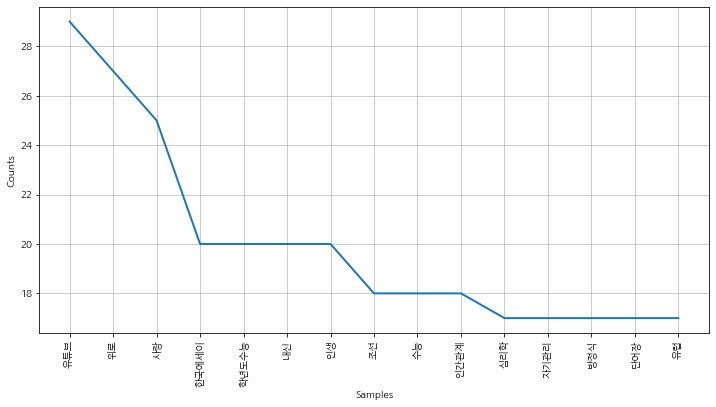

In [43]:
# 단어 빈도 그래프로 그리기

# 한글 폰트 설정
import  matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

f_path = "c:/Windows/Fonts/Nanumgothic.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(12, 6))
keyword_temp3.plot(15)
plt.show()

### 4. subject 값 살펴 보기

In [35]:
subject_temp = []
for line in book_df['subject']:
    #print(line)
    for x in line:
        #print(x)
        if len(line) != 0:
            subject_temp.append(x)

In [36]:
subject_temp

['살인자',
 '인간본성',
 '악인',
 '한국소설',
 '청소년소설',
 '여성서사',
 '일제강점기',
 '근현대사',
 '가족',
 '여성',
 '엄마',
 '성장소설',
 '퓰리처상',
 '미국현대문학',
 '미국소설',
 '노벨문학상',
 '한국에세이',
 '명상',
 '혼자',
 '소확행',
 '연애',
 '일상',
 '마음챙김',
 '심리학',
 '철학에세이',
 '인문과학',
 '시간관리',
 '애견기르기',
 '반려동물',
 '반려견',
 '기독교결혼',
 '정치가',
 '교양과학',
 '우주',
 '은하계',
 '태양',
 '천문학',
 '과학자',
 '교양과학',
 '과학이야기',
 '전염병',
 '감염',
 '과학이야기',
 '물리학',
 '빅뱅이론',
 '양자역학',
 '대유행',
 '전염병',
 '병원균',
 '판데믹',
 '칼세이건',
 '다큐멘터리',
 '우주',
 '생명',
 '자연',
 '기원',
 '법칙',
 '탐구',
 '교양수학',
 '수학개념',
 '과학이야기',
 '뇌기능장애',
 '신경장애',
 '뇌의학',
 '뇌과학',
 '현대의학',
 '임상기록',
 '과학이야기',
 '유전학',
 '현대생물학',
 '경제자격증',
 '무역영어',
 '모듈형',
 'NCS',
 '직업기초능력평가',
 '공기업',
 '공사공단',
 '위포트',
 'NCS',
 '모의고사',
 '과학이야기',
 '현대수학',
 '수학강의',
 '상대성이론',
 '페르마',
 '우주',
 '일반상대성이론',
 '양자이론',
 '현대물리학',
 '뇌졸증',
 '뇌과학',
 '신경과학',
 '뇌의가소성',
 '물리학',
 '물리법칙',
 '양자세계',
 '현실세계',
 '흐름',
 '비유',
 '과학웹툰',
 '공룡생태',
 '과학이야기',
 '생물계',
 '도시화',
 '청소년과학',
 '뇌과학',
 '기초과학',
 '천문학',
 '미세먼지',
 '기후학',
 '오염먼지',
 '지구온난화',
 '대기오염',
 '대기과학자',
 '양자역학',
 '진화

In [37]:
# 주제 키워드 전체 개수
len(subject_temp)

2137

In [38]:
# 주제 키워드 중복 제거 한 후 개수
subject_temp2 = set(subject_temp)
len(subject_temp2)

1351

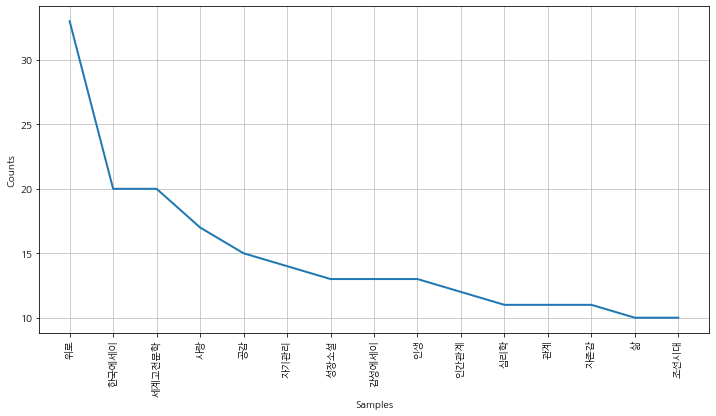

In [44]:
# 단어 빈도 세기
subject_temp3 = nltk.Text(subject_temp, name='키워드')
plt.figure(figsize=(12, 6))
subject_temp3.plot(15)
plt.show()